# Machine Learning and Statistics Module 2020 Project

## Author John Dunne G00273895

*****************************************************************************


### Project Specification

#### Instructions


In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests. Your submission
must be in the form of a git repository containing, at a minimum, the following items:
1. Jupyter notebook that trains a model using the data set. In the notebook you
should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.


To enhance your submission, you might consider developing and comparing more than
one model. Rest assured, all the above concepts will be explored in lecture videos and
other materials in the coming semester.


### Plan to complete the project

* Introduce myself to the contents of the power production data set.
* Include an introduction to the dataset in this notebook.
* Include some statistical analysis od the data set and some plots of the data set. 
* Research models that could be trained on the data set. 
* Pick a model and train it on the data set in this notebook. 
* Explain the model and give an analysis of its accuracy in this notebook. 
* Include a python script in my repository that runs a web service based on the model. 
* Design a user interface from where an end user can send a speed value via HTTP request and receive a response prediction based on the model of power production for that wind speed.
* If time permits train more than one model in this notebook.

## Import the packages to be used in the project

In [1]:
# Numerical arrays
import numpy as np

# pandas imported to read in the csv and display in a pandas dataframe
import pandas as pd 

# matplotlib pyplot will be used for plotting the data set
import matplotlib.pyplot as plt

# plots
import seaborn as sns

# Neural networks
import tensorflow.keras as kr 

# Section 1 - Introduction to the Power Production dataset
**********

A brief introduction to the data set including some statistical analysis and plots.

### 1.1 - Reading in the powerproduction dataset csv and displaying as a pandas dataframe

pandas.read_csv is used to read comma separated value files into a dataframe [1].

In [2]:
# read in the data set with pandas from my repository
df = pd.read_csv("powerproduction.csv")
# display the datas set
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


### 1.2 Some Statistical Analysis with pandas

#### Dataframe.info()

Dataframe.info prints a concise summary about a dataframe [2].

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


#### Dataframe.shape

Dataframe.shape returns a table that shows the number of rows and columns in a dataframe [3].

In [4]:
df.shape

(500, 2)

#### Dataframe.describe()

Dataframe.describe prints a description of each column of data in the data set [4].

**Output of pandas.dataframe.describe() explained:**

* count = total number of rows of data in the data set.
* mean = the central tendency of the data.
* std = standard deviation which is a measurement of the variance of each data point relative to the mean.
* min = the smallest figure collected in each column of data.
* 25% = the 25th percentile - meaning 25% of the total count of measurements collected fall below this measurement.
* 50% = the 50th or median percentile meaning this is the central collected in each column, half of the data collected falls below this measurement and half is above this measurement. Further details on how percentile is calculated can be read here: https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/percentiles-rank-range/.
* 75% = the 75th percentile - meaning 75% of the total count of measurements collected fall below this measurement and 25% are above this measurement.
* max = the largest measurement collected kin each column of data.

In [5]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


### 1.3 - Plot the powerproduction data set

### 1.3.1 - matplotlib.pyplot

I will use matplotlib.pyplot to display a plot of the data in the data set [5] customized with some rcParams commands [6].

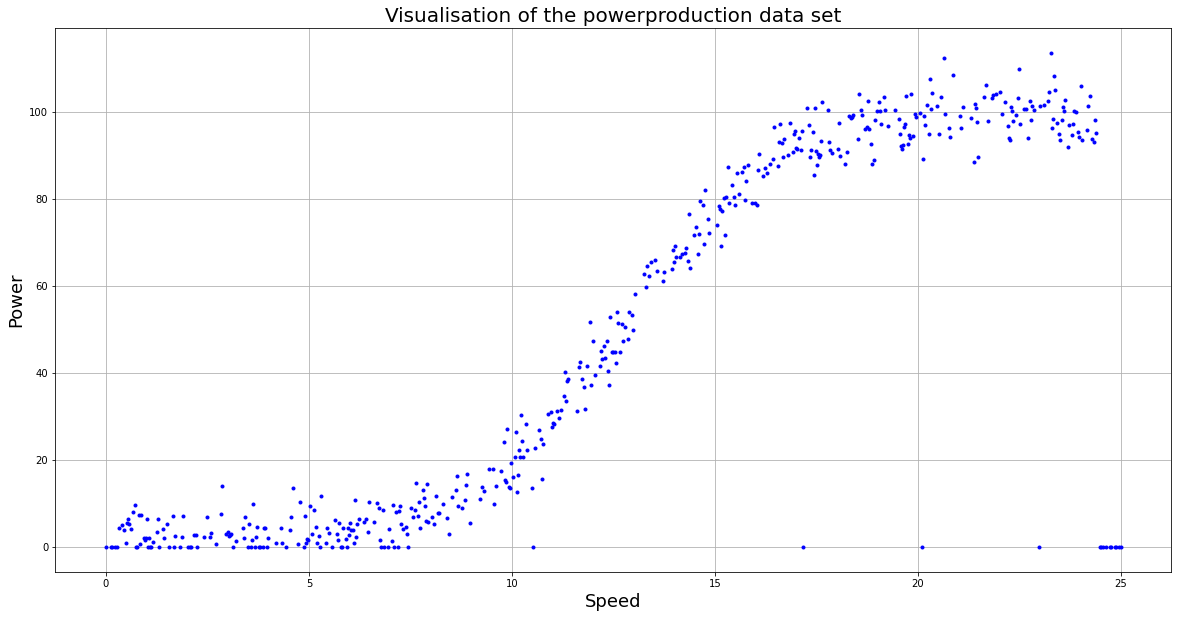

In [6]:
# rc params to customize plot appearance: https://matplotlib.org/tutorials/introductory/customizing.html
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['lines.linewidth'] = 2.5

#matplotlib.pyplot used to plot speed and power from the data set
# .b calls for blue dots in the plot
plt.plot(df['speed'], df['power'], '.b')
# add a title to the plot
plt.title('Visualisation of the powerproduction data set', fontsize=20)
# add labels to the x and y axis
plt.xlabel('Speed', fontsize=18)
plt.ylabel('Power', fontsize=18)
# display grid on the plot
plt.grid()
# show the plot
plt.show()


### 1.3.2 - Seaborn

#### Seaborn Pairplot

Pairplot is used to plot the relationship between variables in a data set. The pairplot function by default plots each variable on the y axis across a single row and the x axis across a single column. Pairplot can read in a data set from pandas df (data frame). The argument hue can be entered to add colour to the plot based on another variable in the data set [7].

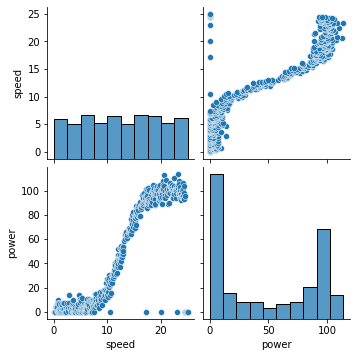

In [7]:
sns.pairplot(df)

With Seaborn pairplot a histogram is plotted by default but this can be changed by adding the diag_kind parameter which can take 3 different parameters:

* hist - plots a histogram 
* kde - density plot 
* auto - the default when hue is selected is denisty, and if hue not selected them histogram

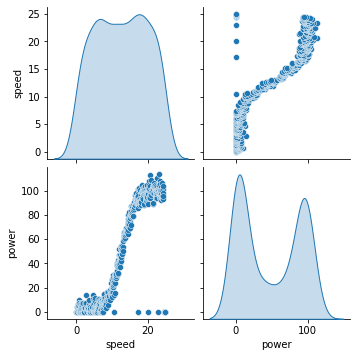

In [8]:
sns.pairplot(df, diag_kind = 'kde')

### What do the above plots say about the data?

* It looks like there are instances where zero power is generated despite high wind speeds. Possibly maintenance on the turbine caused it to be stopped at certain times.
* It looks to me that their is a linear relationship between wind speed and power production. The greater the wind speed the more power is produced. This is what I would have expected without looking at any data. 
* I would think the owners of the turbine though would want any downtime and maintenance etc factored into any forecast for future power production. 
* I find the pyplot gives a very good visual representation of the data and I increased the size using rcparams in order to get a better look at the data points.
* For the most part it looks like the higher the wind speed the more power we could expect to be generated by the turbine. 
* The amount of power generated seems to increase sharply once wind speed of over 10mph are reached. 
* This seems to plateau between 20 and 25 mph wind speed.
* Why does this happen? Maybe I can answer the question later. 

### Section 1 References

[1] pandas; pandas.read_csv; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

[2] pandas; pandas.dataframe.info; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html

[3] pandas; pandas.dataframe.shape; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html

[4] pandas; pandas.dataframe.describe; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

[5] matplotlib; matplotlib.pyplot documentation; https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

[6] matplotlib; Customizing Matplotlib with style sheets and rcParams; https://matplotlib.org/tutorials/introductory/customizing.html

[7] Seaborn, pairplot; https://seaborn.pydata.org/generated/seaborn.pairplot.html

[8] Towards data science; Visualizing data with pairplots in Python; https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166 

# Section 2 - Preprocessing the data set before training a model
****

One of the most important steps to be taken before proceeding is the pre processing of the data. As I have shown in the plots in section 1 of this notebook there are lots of zero values in the data set for power. I thin we can remove these, there are probably explanations for these zero's such as maintenance etc. 

Data cleaning refers to identifying and correcting errors in the dataset that may negatively impact a predictive model [2].



### How many zero values are in the dataset?

Speed column:

In [9]:
df0 = df[df["speed"] == 0]
df0

,speed,power
0,0.0,0.0


In [10]:
df0.count()

speed    1
power    1
dtype: int64

Power column:

In [11]:
df_power_0 = df[df["power"] == 0]
df_power_0

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
15,0.726,0.0
16,0.751,0.0
24,1.026,0.0
26,1.076,0.0
31,1.301,0.0


In [12]:
df_power_0.count()

speed    49
power    49
dtype: int64

So there are 49 zero values in the power column, which includes that one column containing a zero value for speed I showed before. I think the best thing is to remove all of these 49 rows of data from the data set. I dont think they add value.

### Drop all rows that have zero values for both speed and power

I have found a StackOverflow post on dropping rows in a pandas dataframe where there are zero values [4].

Below I drop the 49 rows where we have zero values.

In [13]:
# Adapted from: https://stackoverflow.com/questions/27020312/drop-row-in-pandas-dataframe-if-any-value-in-the-row-equals-zero/27020741
df_clean = df[(df != 0).all(1)]
df_clean

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [14]:
# count of rows in the cleaned data set
df_clean.count()

speed    451
power    451
dtype: int64

The new cleaned data set contains 451 rows of data.

In [15]:
# describe the cleaned data set
df_clean.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


### Plot the data set before and after cleaning

Text(0.5, 1.0, 'Data after cleaning')

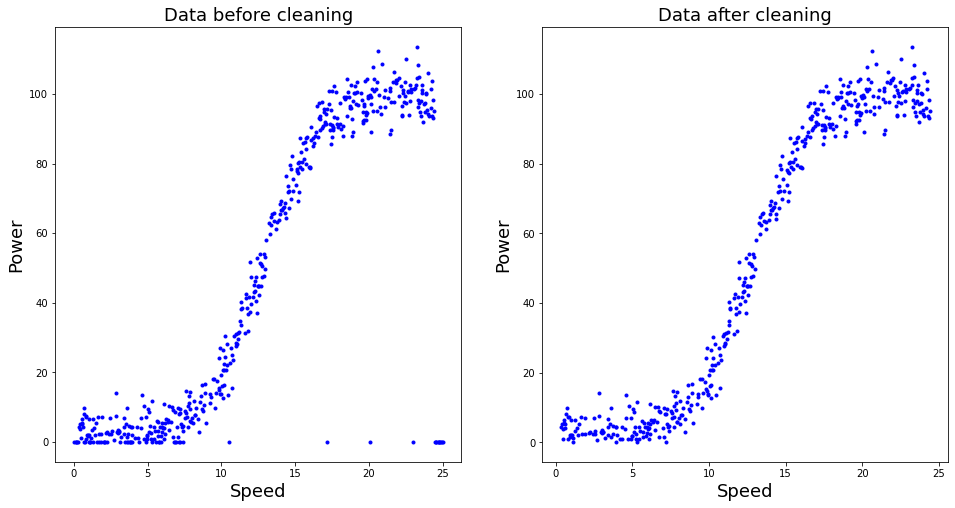

In [16]:
# Set the parameters for the subplots to be created
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Plot the data set before and after cleaning for comparison purposes
axes[0].plot(df['speed'], df['power'], '.b')
axes[1].plot(df_clean['speed'], df_clean['power'], '.b')

# Add labels 
axes[0].set_xlabel('Speed', fontsize=18)
axes[0].set_ylabel('Power', fontsize=18)
axes[1].set_xlabel('Speed', fontsize=18)
axes[1].set_ylabel('Power', fontsize=18)

# Add titles to subplots
axes[0].set_title('Data before cleaning', fontsize=18)
axes[1].set_title('Data after cleaning', fontsize=18)

Now that the data set has been preprocessed I can proceed to research and select a suitable model for and try to traing it on the data set in this notebook.

### Section 2 - References

[1] Github Ian McLoughlin; keras-neurons; https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-neurons.ipynb

[2] Machine Learning Mastery; How to Perform Data Cleaning for Machine Learning with Python; https://machinelearningmastery.com/basic-data-cleaning-for-machine-learning/

[3] Medium; Cleaning and Prepping Data with Python for Data Science — Best Practices and Helpful Packages; https://medium.com/@rrfd/cleaning-and-prepping-data-with-python-for-data-science-best-practices-and-helpful-packages-af1edfbe2a3

[4] StackOverflow;Drop row in pandas dataframe if any value in the row equals zero; https://stackoverflow.com/questions/27020312/drop-row-in-pandas-dataframe-if-any-value-in-the-row-equals-zero/27020741

[5] Keras; Introduction to keras for engineers; https://keras.io/getting_started/intro_to_keras_for_engineers/

## Section 3 - Selecting a suitable model and training on the data set

### 3.1 - Neural Networks in Keras

Keras comes as part of the tensorflow machine learning installation in Python. Please see Readme file in my repository for details on installing tensorflow on your machine.

Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result as fast as possible is key to doing good research [3].

Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models. It wraps the efficient numerical computation libraries Theano and TensorFlow and allows you to define and train neural network models in just a few lines of code [6].

Neural networks expect numerical inputs and so the power production dataset is ideal for working with a neural network as it has just 2 columns of numerical data. 

**Input variable (X) = Speed**

**Output variable (y) = Power**

#### Convert data to numpy array

I will convert the data from a pandas dataframe to a numpy array in order to feed the data into keras and train a neural network. I do this below following an example from [5]:

In [17]:
# Adapted from [5]
# Changing pandas dataframe to numpy array
X = df_clean.iloc[:,0].values
y = df_clean.iloc[:,1].values

In [18]:
# X is the input (speed)
X

array([ 0.325,  0.4  ,  0.45 ,  0.501,  0.526,  0.551,  0.576,  0.626,
        0.676,  0.701,  0.801,  0.826,  0.851,  0.926,  0.951,  0.976,
        1.001,  1.051,  1.101,  1.151,  1.251,  1.276,  1.401,  1.426,
        1.502,  1.652,  1.702,  1.877,  1.902,  2.177,  2.227,  2.402,
        2.477,  2.553,  2.578,  2.703,  2.828,  2.853,  2.953,  3.003,
        3.028,  3.053,  3.078,  3.203,  3.378,  3.403,  3.428,  3.529,
        3.604,  3.629,  3.704,  3.729,  3.904,  3.929,  3.954,  3.979,
        4.179,  4.304,  4.329,  4.53 ,  4.555,  4.605,  4.73 ,  4.78 ,
        4.905,  4.93 ,  4.955,  4.98 ,  5.03 ,  5.08 ,  5.13 ,  5.18 ,
        5.205,  5.255,  5.28 ,  5.305,  5.43 ,  5.455,  5.506,  5.631,
        5.681,  5.706,  5.731,  5.831,  5.906,  5.956,  5.981,  6.006,
        6.031,  6.081,  6.106,  6.131,  6.156,  6.181,  6.231,  6.356,
        6.406,  6.456,  6.481,  6.607,  6.682,  6.732,  6.757,  6.832,
        6.982,  7.057,  7.082,  7.157,  7.182,  7.207,  7.232,  7.257,
      

In [19]:
# y will be the output value (power)
y

array([4.33100e+00, 5.18600e+00, 3.82600e+00, 1.04800e+00, 5.55300e+00,
       6.49800e+00, 5.24100e+00, 4.22000e+00, 7.97400e+00, 9.74600e+00,
       7.27100e+00, 7.95000e-01, 7.35000e+00, 1.99600e+00, 1.60900e+00,
       2.06400e+00, 6.51100e+00, 2.08500e+00, 1.21000e-01, 1.20800e+00,
       3.37300e+00, 6.51000e+00, 4.15600e+00, 2.00500e+00, 5.35200e+00,
       7.22100e+00, 2.43900e+00, 2.35900e+00, 7.04800e+00, 2.70100e+00,
       2.86900e+00, 2.28700e+00, 6.94700e+00, 2.37000e+00, 3.16500e+00,
       6.67000e-01, 7.55900e+00, 1.41310e+01, 2.89400e+00, 3.57800e+00,
       2.63300e+00, 2.83600e+00, 3.06300e+00, 1.36000e+00, 4.33400e+00,
       2.16700e+00, 6.81900e+00, 5.30000e+00, 1.53500e+00, 9.89000e+00,
       2.27000e+00, 4.59500e+00, 4.45300e+00, 4.41500e+00, 1.32000e-01,
       2.03000e+00, 1.03500e+00, 4.43700e+00, 1.04300e+00, 3.93400e+00,
       6.82400e+00, 1.35920e+01, 8.20000e-01, 1.04440e+01, 7.06000e+00,
       9.46000e-01, 1.90700e+00, 1.68100e+00, 9.51900e+00, 2.973

Check the number of elements in each array is correct.

In [20]:
X.size

451

In [21]:
y.size

451

The data is now ready so I should proceed with training a neural network using keras.

### 3.2 - Defining a model in Keras

**What is a layer and what is a model?**

A "layer" is a simple input-output transformation. A "model" is a directed acyclic graph of layers. You can think of a model as a "bigger layer" that encompasses multiple sublayers and that can be trained via exposure to data [4].

Models in Keras are defined as a sequence of layers. We create a Sequential model and add layers one at a time until we are happy with our network architecture [6].

The most common and most powerful way to build Keras models is the Functional API. To build models with the Functional API, you start by specifying the shape (and optionally the dtype) of your inputs [4].

Define model- Now we need a neural network model. This means we need to specify the number of hidden layers in the neural network and their size, the input and output size [5].

#### Code Explained

**Sequential** - let's keras know I intend to create a model sequentially with the output of each layer being the input to the nexy layer.

**model.add** - adds a layer to the neural network. In my case I have just 1 layer.

**Dense** - a densely connected neural network layer which takes the parameters:

* output dimension - size of the output, in this case 1.
    
* input dimension - size of the input, again 1.
  
* activation function - there are a number of options such as linear, sigmoid and relu. The full list of activation functions can be viewed at [7].
    
* kernel-initializer -  Regularizer function applied to the kernel weights matrix [8].

* bias-initializer - Regularizer function applied to the bias vector [8]
    
    
**model.compile** - the model is built.

* loss - We must specify the loss function to use to evaluate a set of weights [6].
    
* optimizer -  the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training [6].
    
    
If adding more than one layer there is no need to specify the number of input dimensions again as the model is defined as sequential. Keras will consider the input dimension to be the same size as the output of the previous layer.

In [22]:
# Create a new neural network.
model = kr.models.Sequential()

# Add a single neuron in a single layer, initialised with weight 1 and bias 0.
model.add(kr.layers.Dense(1, input_dim=1, activation="sigmoid", kernel_initializer='ones', bias_initializer='zeros'))

# Compile the model.
model.compile(loss="mean_squared_error", optimizer="adam")

You can print a summary of how your data gets transformed at each stage of the model. This is useful for debugging [4].

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### 3.3 - Train the model

The next step is to train your model on your data. The Model class features a built-in training loop, the fit() method. It accepts Dataset objects, Python generators that yield batches of data, or NumPy arrays [4].

Besides the data, you have to specify two key parameters: the batch_size and the number of epochs (iterations on the data). Since the data yielded by a dataset is expected to be already batched, you don't need to specify the batch size here [4].

The fit() call returns a "history" object which records what happened over the course of training [4].

In [24]:
# print(history.history)

### Section 3 - References

[1] Github Ian McLoughlin; keras-neurons; https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-neurons.ipynb

[2] Github Ian McLoughlin; Linear Regression in Keras; https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-linear.ipynb

[3] Keras; About Keras; https://keras.io/about/

[4] Keras; Introduction to keras for engineers; https://keras.io/getting_started/intro_to_keras_for_engineers/

[5] Towards Data Science; Building our first neural network in keras; https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

[6] Machine learing mastery; Your First Deep Learning Project in Python with Keras Step-By-Step; https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

[7] Keras; Layer activation functions; https://keras.io/api/layers/activations/

[8] Keras; Dense layer; https://keras.io/api/layers/core_layers/dense/

[9] Keras; Adam; https://keras.io/api/optimizers/adam/


## End